# Importing Libraries

In [65]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 



In [66]:
data = pd.read_csv('Transformed_Housing_Data2.csv')

# Sclaing the dataset 

In [67]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Y= data['Sale_Price']
X = scaler.fit_transform(data.drop(columns=['Sale_Price']))
X = pd.DataFrame(data = X, columns=data.drop(columns=['Sale_Price']).columns)

# Checking and removing multicollinearity

In [68]:
X.corr()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
No of Bedrooms,1.000000,0.515813,0.576628,0.031692,0.175536,0.079575,0.349223,0.477549,0.303294,-0.154113,...,-0.006578,-0.010603,-0.039342,-0.074129,0.024433,0.019420,0.090177,0.016725,0.102736,0.035694
No of Bathrooms,0.515813,1.000000,0.754568,0.087732,0.500776,0.187791,0.635638,0.685088,0.283798,-0.505954,...,0.063761,-0.032810,-0.081460,-0.034459,0.084054,0.052804,0.123256,0.037746,0.110012,0.067871
Flat Area (in Sqft),0.576628,0.754568,1.000000,0.172721,0.354142,0.284678,0.705725,0.876226,0.435142,-0.318146,...,0.103841,-0.058817,-0.063005,-0.078761,0.086139,0.075978,0.160045,0.051211,0.169576,0.090253
Lot Area (in Sqft),0.031692,0.087732,0.172721,1.000000,-0.005162,0.074668,0.102314,0.183492,0.015252,-0.053119,...,0.021605,0.023684,0.052103,-0.041112,-0.012050,0.015320,-0.023270,-0.027419,-0.007025,0.002671
No of Floors,0.175536,0.500776,0.354142,-0.005162,1.000000,0.029504,0.461368,0.524031,-0.245572,-0.489244,...,0.023719,-0.003385,-0.067904,0.079211,0.071786,0.009203,0.069857,0.064981,-0.008633,0.005868
No of Times Visited,0.079575,0.187791,0.284678,0.074668,0.029504,1.000000,0.223661,0.167812,0.276974,0.053395,...,0.401856,-0.065000,0.004754,0.005905,0.003509,0.024801,0.068144,-0.012548,0.065335,0.012923
Overall Grade,0.349223,0.635638,0.705725,0.102314,0.461368,0.223661,1.000000,0.705153,0.145232,-0.456711,...,0.070332,-0.075495,-0.121379,-0.047869,0.151245,0.095613,0.200548,0.077126,0.156952,0.048638
Area of the House from Basement (in Sqft),0.477549,0.685088,0.876226,0.183492,0.524031,0.167812,0.705153,1.000000,-0.051825,-0.423848,...,0.072099,-0.028348,-0.052418,-0.090628,0.086640,0.062267,0.129310,0.029477,0.134021,0.087398
Basement Area (in Sqft),0.303294,0.283798,0.435142,0.015252,-0.245572,0.276974,0.145232,-0.051825,1.000000,0.133072,...,0.080595,-0.069149,-0.032302,0.006247,0.016422,0.040662,0.090206,0.051128,0.101159,0.023775
Age of House (in Years),-0.154113,-0.505954,-0.318146,-0.053119,-0.489244,0.053395,-0.456711,-0.423848,0.133072,1.000000,...,0.026149,-0.070111,0.022094,0.095882,-0.056974,-0.009965,0.025718,0.101486,-0.002705,-0.002492


pair of independent variables with correlation greater than 0.5

In [69]:
k= X.corr()
Z = [[str(i), str(j)] for i in k.columns for j in k.columns if (k.loc[i,j]> abs(0.5)) & (i!=j)]
Z, len(Z)

([['No of Bedrooms', 'No of Bathrooms'],
  ['No of Bedrooms', 'Flat Area (in Sqft)'],
  ['No of Bathrooms', 'No of Bedrooms'],
  ['No of Bathrooms', 'Flat Area (in Sqft)'],
  ['No of Bathrooms', 'No of Floors'],
  ['No of Bathrooms', 'Overall Grade'],
  ['No of Bathrooms', 'Area of the House from Basement (in Sqft)'],
  ['No of Bathrooms', 'Living Area after Renovation (in Sqft)'],
  ['Flat Area (in Sqft)', 'No of Bedrooms'],
  ['Flat Area (in Sqft)', 'No of Bathrooms'],
  ['Flat Area (in Sqft)', 'Overall Grade'],
  ['Flat Area (in Sqft)', 'Area of the House from Basement (in Sqft)'],
  ['Flat Area (in Sqft)', 'Living Area after Renovation (in Sqft)'],
  ['Lot Area (in Sqft)', 'Lot Area after Renovation (in Sqft)'],
  ['No of Floors', 'No of Bathrooms'],
  ['No of Floors', 'Area of the House from Basement (in Sqft)'],
  ['Overall Grade', 'No of Bathrooms'],
  ['Overall Grade', 'Flat Area (in Sqft)'],
  ['Overall Grade', 'Area of the House from Basement (in Sqft)'],
  ['Overall Grade', 

# Calculating VIF

In [70]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = X

In [71]:
def MC_remover(data):
    vif = pd.Series([variance_inflation_factor(data.values, i)for i in range (data.shape[1])], index = data.columns)
    if vif.max()>5:
        print(vif[vif==vif.max()].index[0],'has been removed')
        data = data.drop(columns=[vif[vif==vif.max()].index[0]])
        return data
    else:
        print('No mc present anymore')
        return data
    

In [72]:
for i in range(7):
    vif_data= MC_remover(vif_data)

Flat Area (in Sqft) has been removed
Condition_of_the_House_Fair has been removed
No mc present anymore
No mc present anymore
No mc present anymore
No mc present anymore
No mc present anymore


In [73]:
vif_data.head()

,No of Bedrooms,No of Bathrooms,Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Latitude,...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,-0.398724,-1.447526,-0.228291,-0.915389,-0.30579,-0.563993,-0.734722,-0.658697,0.544734,-0.352576,...,-0.087181,-0.350481,-0.482158,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
1,-0.398724,0.175684,-0.189858,0.936817,-0.30579,-0.563993,0.460990,0.245134,0.680915,1.161645,...,-0.087181,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
2,-1.474115,-1.447526,-0.123276,-0.915389,-0.30579,-1.468566,-1.229916,-0.658697,1.293731,1.283619,...,-0.087181,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
3,0.676667,1.149611,-0.243983,-0.915389,-0.30579,-0.563993,-0.891735,1.397518,0.204281,-0.283288,...,-0.087181,-0.350481,-0.482158,2.383223,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
4,-0.398724,-0.148958,-0.169628,-0.915389,-0.30579,0.340581,-0.130827,-0.658697,-0.544715,0.409587,...,-0.087181,-0.350481,-0.482158,-0.419600,2.087275,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158


Checking if the function worked or not!?

In [74]:
VIF = pd.Series([variance_inflation_factor(vif_data.values, i)for i in range (vif_data.shape[1])], index = vif_data.columns)
VIF, len(VIF)

(No of Bedrooms                               1.638990
 No of Bathrooms                              3.373805
 Lot Area (in Sqft)                           2.107495
 No of Floors                                 2.127703
 No of Times Visited                          1.432363
 Overall Grade                                2.956967
 Area of the House from Basement (in Sqft)    4.580042
 Basement Area (in Sqft)                      1.974981
 Age of House (in Years)                      2.626504
 Latitude                                     2.471343
 Longitude                                    1.672667
 Living Area after Renovation (in Sqft)       3.063886
 Lot Area after Renovation (in Sqft)          2.144068
 Years Since Renovation                       2.788064
 Condition_of_the_House_Excellent             1.206487
 Condition_of_the_House_Good                  1.251488
 Condition_of_the_House_Okay                  1.025386
 Ever_Renovated_Yes                           2.955539
 Waterfron

# Train and Test

In [75]:
X= vif_data
Y= data['Sale_Price']

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, Y,test_size=0.3, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((15126, 28), (6483, 28), (15126,), (6483,))

# Linear regression

In [77]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [78]:
predictions = lr.predict(X_test)
lr.score(X_test, y_test)

0.8471617813712331

# 1. Residuals

In [79]:
residuals = predictions - y_test
residual_table = pd.DataFrame({'residuals': residuals,
                              'predictions':predictions})
residual_table = residual_table.sort_values(by='predictions')

In [80]:
z= [i for i in range(int(residual_table['predictions'].max()))]
k = [0 for i in range(int(residual_table['predictions'].max()))]

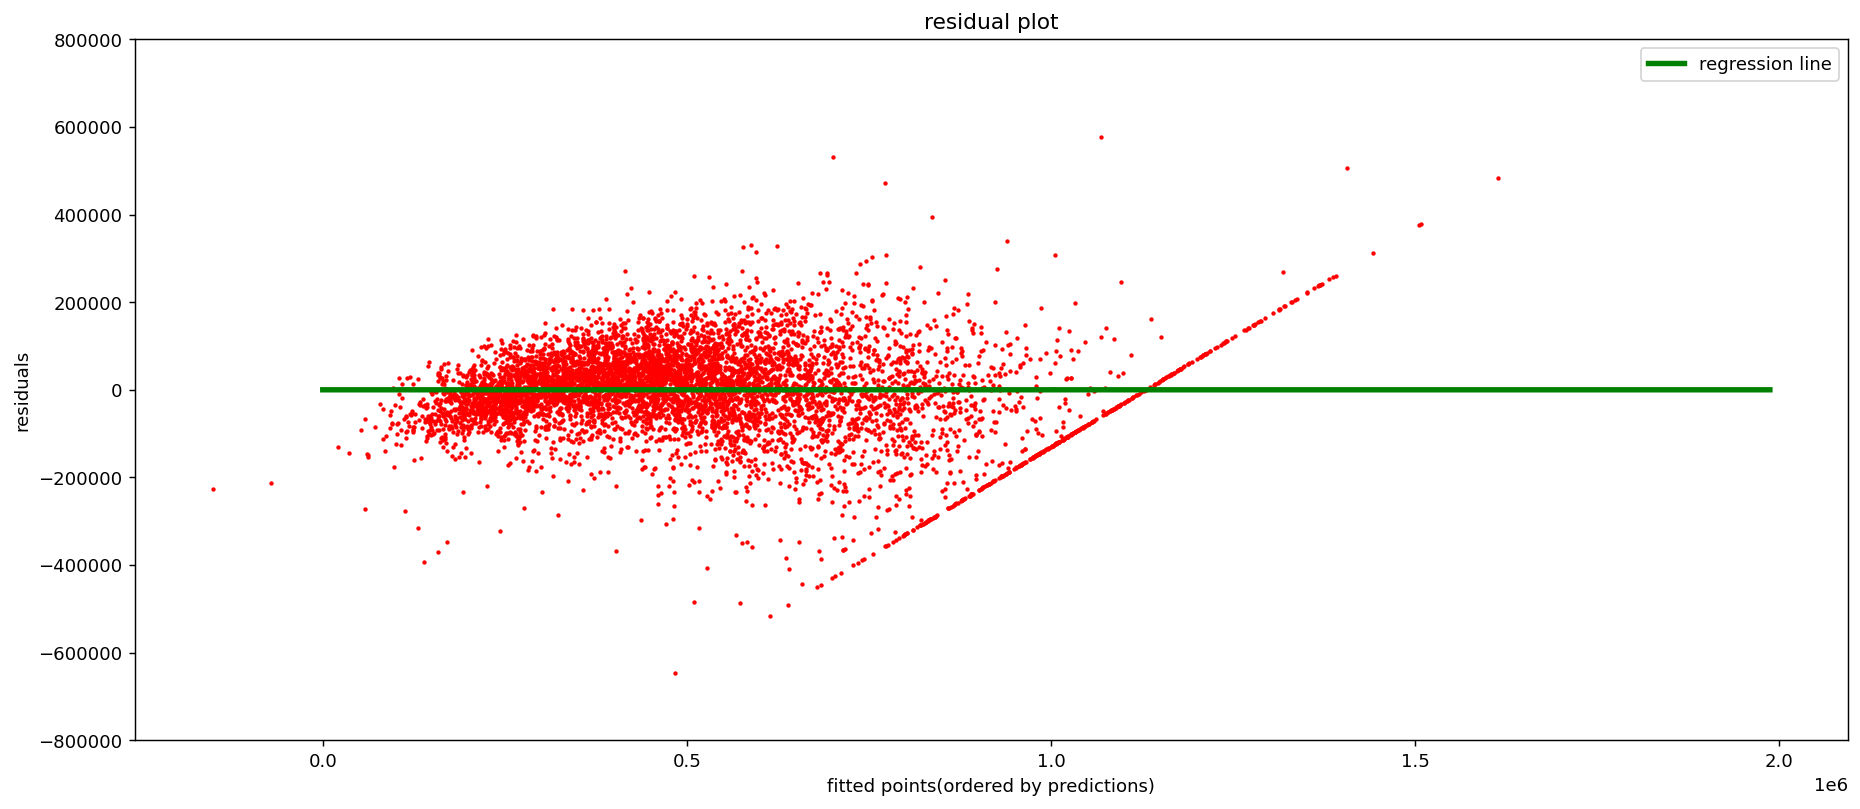

In [81]:
plt.figure(dpi=130,figsize=(17,7))

plt.scatter(residual_table['predictions'], residual_table['residuals'], color='red', s=2)
plt.plot(z,k , color = 'green', linewidth = 3, label= 'regression line')
plt.ylim(-800000,800000)
plt.xlabel('fitted points(ordered by predictions)')
plt.ylabel('residuals')
plt.title('residual plot')
plt.legend()
plt.show()

# 2. Distribution of errors

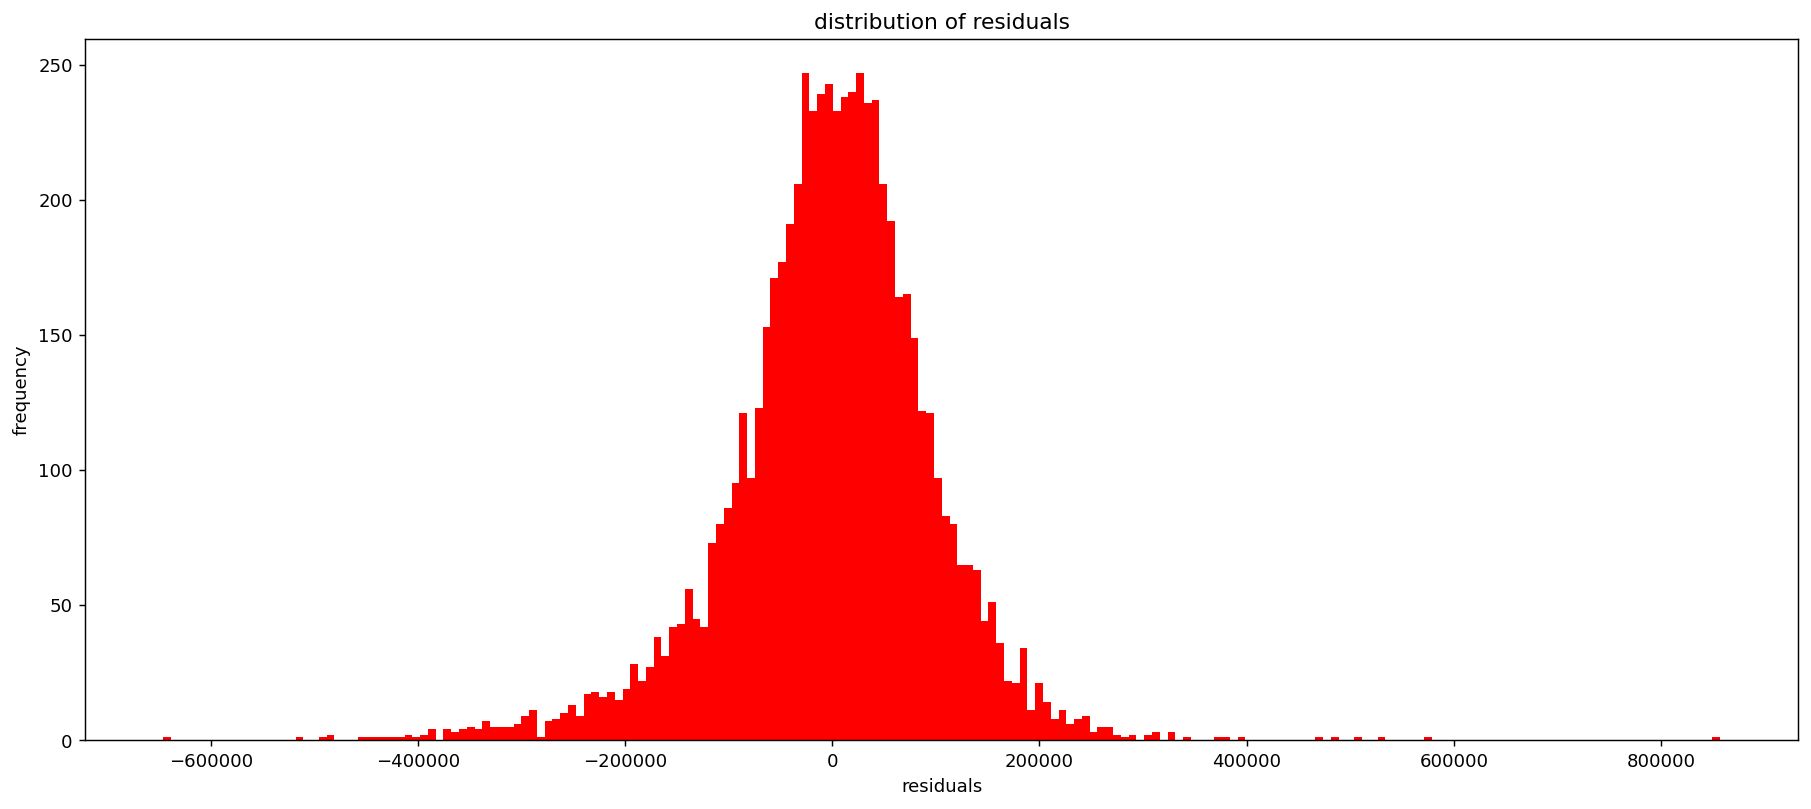

In [82]:
plt.figure(dpi= 130 , figsize=(17,7))
plt.hist(residual_table['residuals'], color = 'red', bins = 200)
plt.xlabel('residuals')
plt.ylabel('frequency')
plt.title('distribution of residuals')
plt.show()

# Model coefficients

In [83]:
coefficients_table = pd.DataFrame({'columns':X_train.columns,
                                   'coefficients': lr.coef_})
coefficients_table = coefficients_table.sort_values(by = 'coefficients')

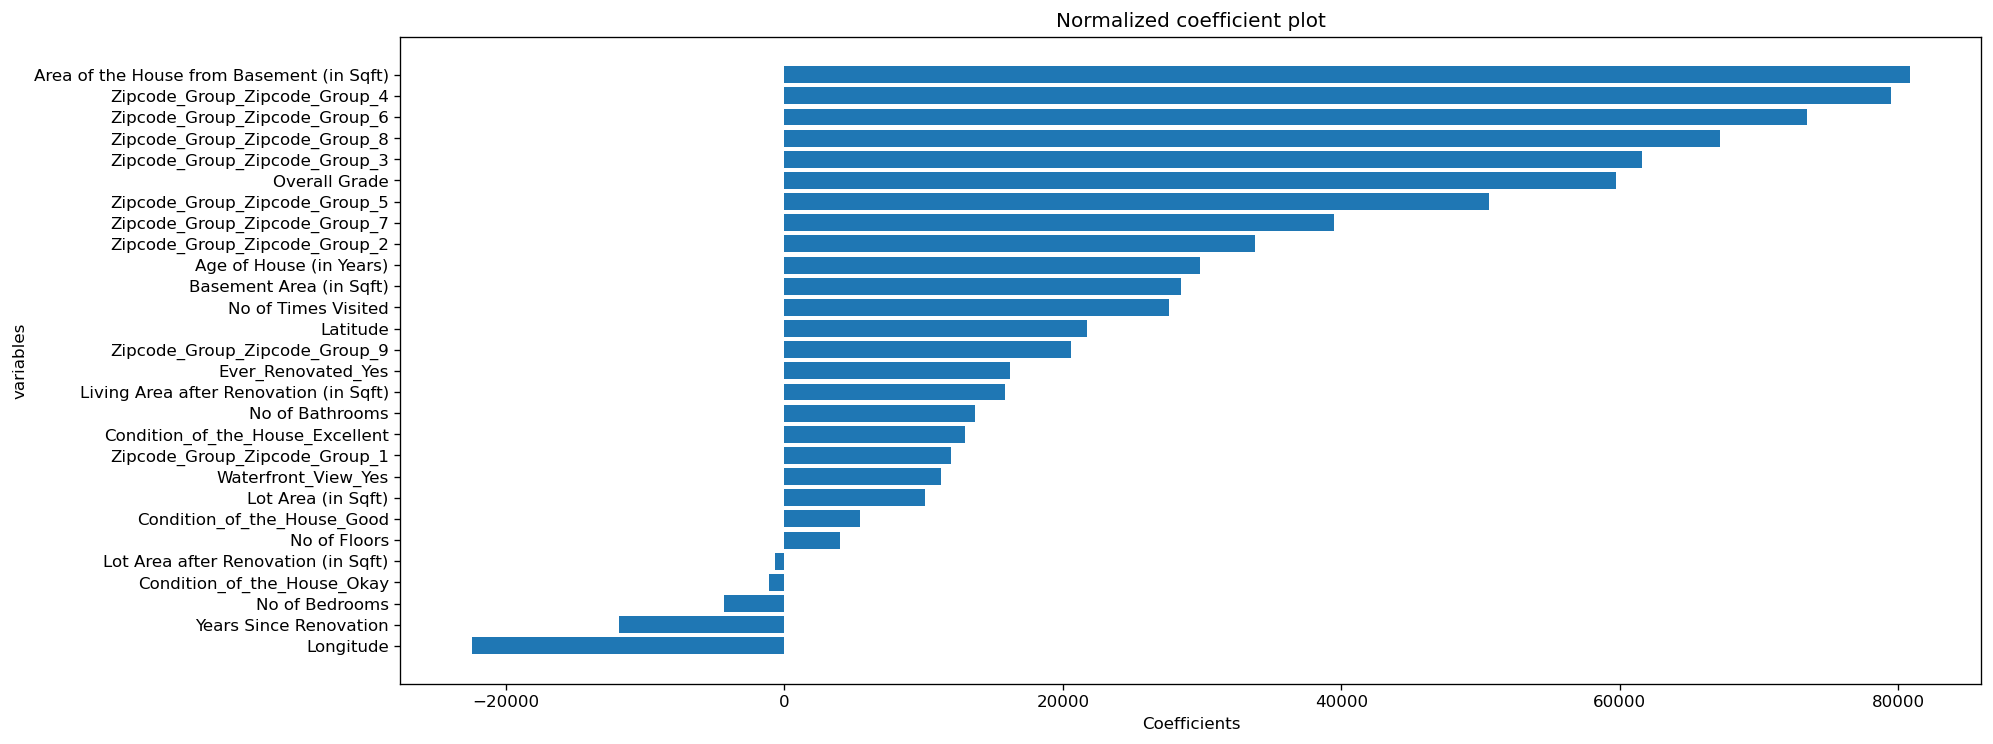

In [84]:
plt.figure(figsize=(17,7), dpi=120)
x = coefficients_table['columns']
y = coefficients_table['coefficients']
plt.barh(x,y)
plt.xlabel("Coefficients")
plt.ylabel("variables")
plt.title("Normalized coefficient plot")
plt.show()

In [85]:
data= pd.read_csv("Raw_Housing_Prices3.csv")
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,None,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


In [86]:
sum(data.isnull().sum())

0

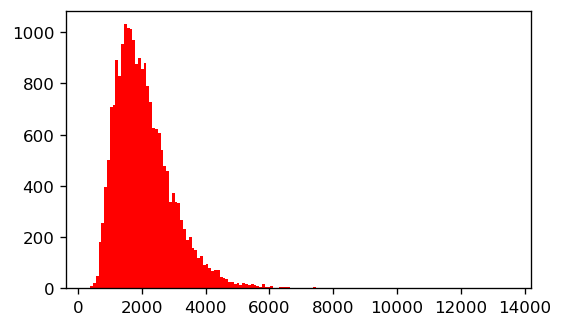

In [87]:
plt.figure(dpi=120, figsize=(5,3
                             
                             ))
plt.hist(data['Flat Area (in Sqft)'], bins=150, color='red')
plt.show()

In [88]:
def log_transform(sample_data):
    return np.log(sample_data)

In [89]:
data['Transformed Flat Area'] = data['Flat Area (in Sqft)'].map(log_transform)

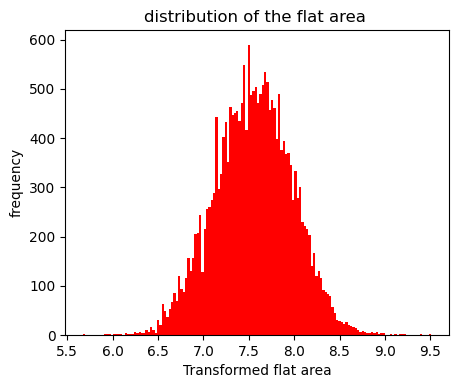

In [90]:
plt.figure(dpi=99,figsize=(5,4))
plt.hist(data['Transformed Flat Area'], bins=150,color='red')
plt.xlabel('Transformed flat area')
plt.ylabel('frequency')
plt.title('distribution of the flat area ')
plt.show()

# Feature Transfomation


In [91]:
label_encoded= data['Condition of the House']
label_encoded.value_counts()

Fair         14028
Good          5678
Excellent     1701
Okay           172
Bad             30
Name: Condition of the House, dtype: int64

In [92]:
label_encoded = label_encoded.map({'Bad':1,
                                   'Okay':2,
                                   'Fair':3,
                                   'Good':4,
                                   'Excellent':5})
label_encoded.value_counts()

3    14028
4     5678
5     1701
2      172
1       30
Name: Condition of the House, dtype: int64

In [93]:
mean= []
for i in data['Condition of the House'].unique():
       mean.append(data['Sale Price'][data['Condition of the House']==i].mean())


Text(0, 0.5, 'mean sale price')

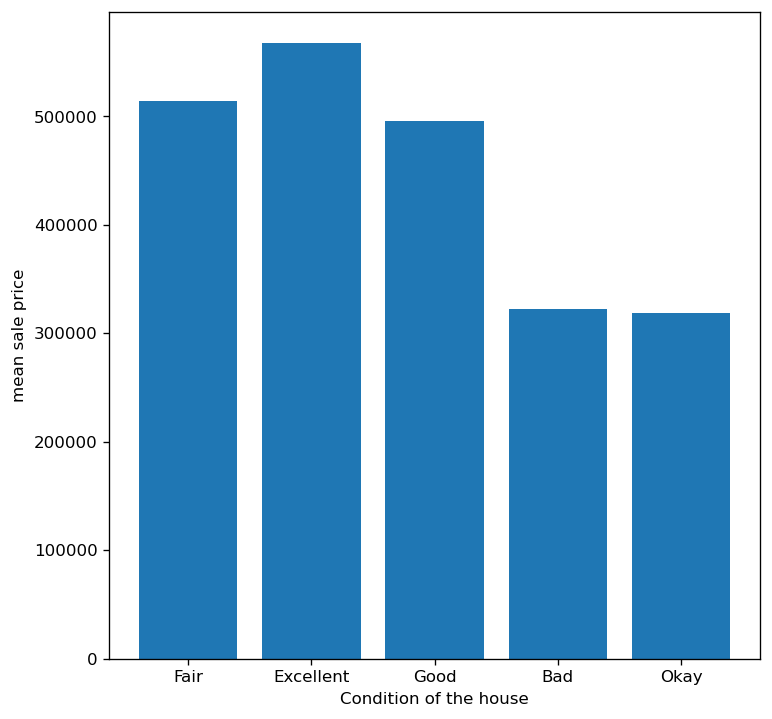

In [94]:
plt.figure(figsize=(7,7), dpi=120)

plt.bar(data['Condition of the House'].unique(),mean)
plt.xlabel('Condition of the house')
plt.ylabel('mean sale price')

In [95]:
mapping = {'Excellent':'Excellent',
           'Fair':'Good',
           'Good':'Good',
           'Okay':'Okay',
           'Bad':'Okay'
}
data['Condition of the House']=data['Condition of the House'].map(mapping)

In [96]:
mean= []
for i in data['Condition of the House'].unique():
       mean.append(data['Sale Price'][data['Condition of the House']==i].mean())


Text(0, 0.5, 'mean sale price')

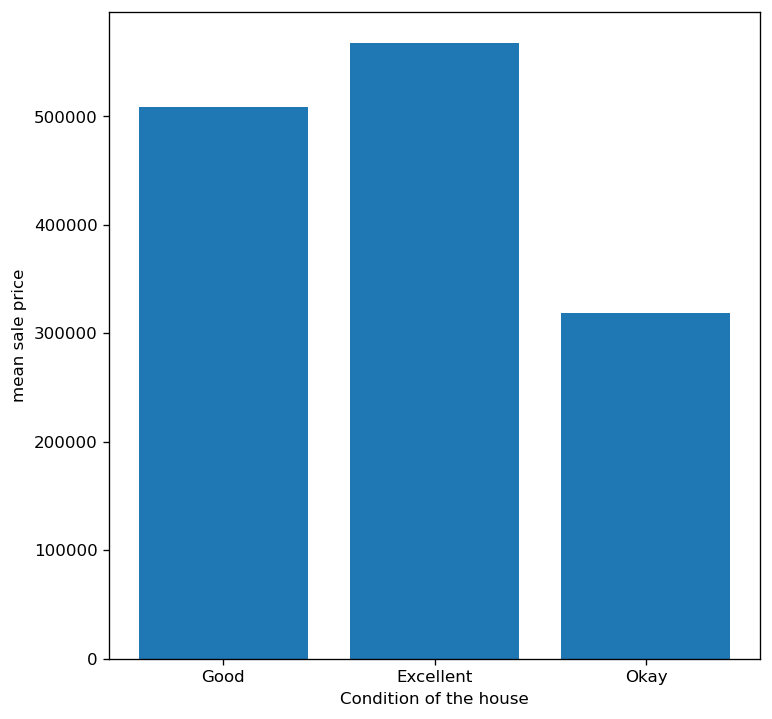

In [97]:
plt.figure(figsize=(7,7), dpi=120)

plt.bar(data['Condition of the House'].unique(),mean)
plt.xlabel('Condition of the house')
plt.ylabel('mean sale price')

In [98]:
len(data['Age of House (in Years)'].unique())

116

In [99]:
def age_of_house(x):
    if x<10:
        x ='new' 
    elif x<50:
        x= 'old' 
    else :
        x = 'very old' 
    return x

In [100]:
cat_house_age = data['Age of House (in Years)'].map(age_of_house)
cat_house_age.unique()

array(['very old', 'old', 'new'], dtype=object)

# Date time features


In [101]:
data['Date House was Sold'].head()

0     14 October 2017
1    14 December 2017
2    15 February 2016
3    14 December 2017
4    15 February 2016
Name: Date House was Sold, dtype: object

In [103]:
time = pd.DatetimeIndex(data['Date House was Sold'])
data['year_sold'] = time.year 
data['month_sold'] = time.month 
#data['weekday_sold'] = time.weekdayname
data['date_sold'] = time.days_in_month

data[['year_sold', 'month_sold', 'date_sold']].head()

,year_sold,month_sold,date_sold
0,2017,10,31
1,2017,12,31
2,2016,2,29
3,2017,12,31
4,2016,2,29


In [106]:
def luxury_home(row):
    count = 0
    if row[0] == 'Yes':
        count+=1
    if row[1] in ['Excellent', 'Good']:
        count+=1
    if row[2]>=8:
        count+=1
    if count>=2:
        return 'Yes'
    else:
        return "No" 
data['luxury_home'] = data[['Waterfront View','Condition of the House','Overall Grade']].apply(luxury_home, axis = 1)
data['luxury_home'].unique()

array(['No', 'Yes'], dtype=object)

In [109]:
luxury = data.pivot_table(values = "Sale Price", columns= 'luxury_home',aggfunc='mean')
luxury

luxury_home,No,Yes
Sale Price,380385.64475,655067.166021


Text(0, 0.5, 'mean sale price')

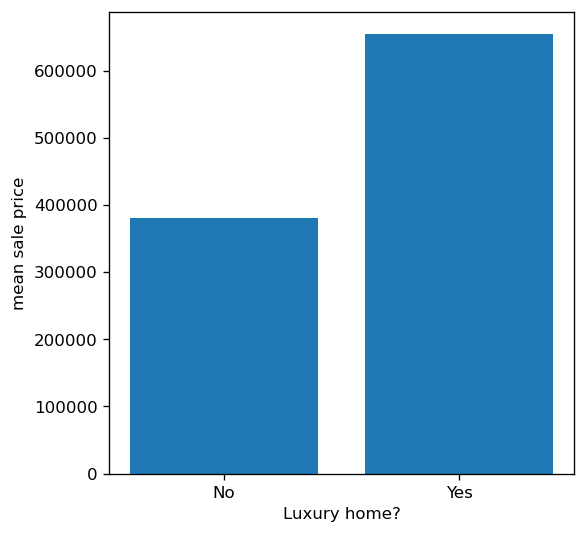

In [111]:
plt.figure(figsize=(5,5), dpi = 120)
plt.bar(luxury.columns, luxury.iloc[0])
plt.xlabel('Luxury home?')
plt.ylabel("mean sale price")

In [112]:
import os
import multiprocessing

mem_bytes = os.sysconf('SC_PAGE_SIZE') * os.sysconf('SC_PHYS_PAGES')  # e.g. 4015976448
mem_gib = mem_bytes/(1024.**3)  # e.g. 3.74
print("RAM: %f GB" % mem_gib)
print("CORES: %d" % multiprocessing.cpu_count())


RAM: 8.000000 GB
CORES: 8
